# 라이브러리 재설치

In [4]:
# !pip uninstall -y xgboost lightgbm

In [5]:
# !pip install xgboost==1.5.0 lightgbm==3.3.2

In [6]:
# !pip install hyperopt

In [7]:
# !pip install -U imbalanced-learn

# 메인코드

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
# google drive
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/kaggle/MainQuest_CCFraud/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/MainQuest_CCFraud/test.csv')
submission  = pd.read_csv('/content/drive/MyDrive/kaggle/MainQuest_CCFraud/sample_submission.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### train.csv 탐색

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [10]:
train.shape

(170883, 32)

In [11]:
train.head(5)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- 데이터 타입은 모두 수치형, float이 다수 존재

In [12]:
# 결측치 확인
train.isnull().sum()

,0
id,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0


In [13]:
# 중복확인
train.duplicated().sum()

np.int64(0)

In [14]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [15]:
# 이진형 변수 확인
train.nunique()

,0
id,170883
Time,78599
V1,165620
V2,165620
V3,165620
V4,165620
V5,165620
V6,165620
V7,165620
V8,165620


In [16]:
train['Class'].value_counts()

,count
Class,
0,170523
1,360


#### 데이터 시각화

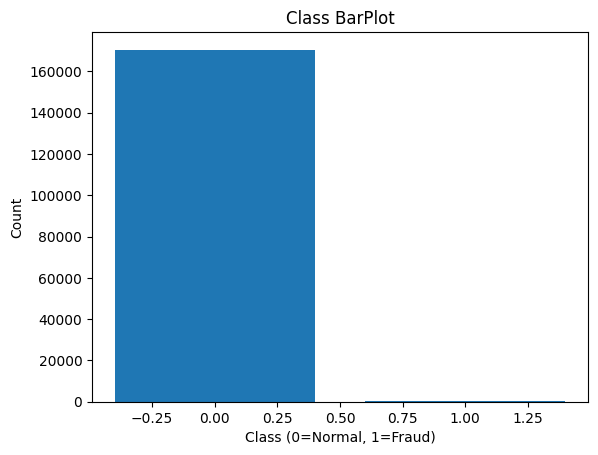

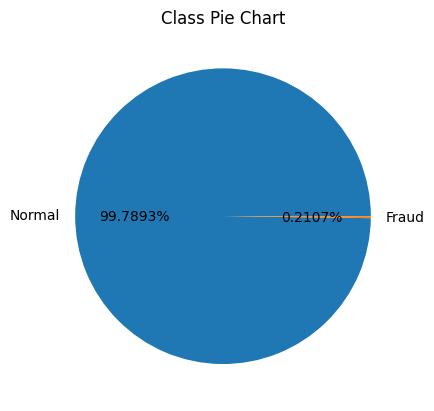

In [17]:

# Class 컬럼 분포 확인
# fraud(1)과 normal(0) 갯수와 비율을 구합니다.
class_counts = train['Class'].value_counts().sort_index()
total_count = len(train)

# 시각화: Class 분포 막대 그래프
plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.title('Class BarPlot')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.show()

# 시각화: Class 분포 파이 차트
plt.figure()
plt.pie(class_counts.values, labels=['Normal','Fraud'],autopct='%1.4f%%')
plt.title('Class Pie Chart')
plt.show()

### 데이터 전처리
 - 데이터가 왜곡되어있어 로그변환수행
 - 불필요한 feature인 Time 삭제

In [48]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 칼럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace=True)
  return df_copy

In [45]:
get_preprocessed_df(train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Amount_Scaled  170883 non-null  float64
 1   id             170883 non-null  int64  
 2   V1             170883 non-null  float64
 3   V2             170883 non-null  float64
 4   V3             170883 non-null  float64
 5   V4             170883 non-null  float64
 6   V5             170883 non-null  float64
 7   V6             170883 non-null  float64
 8   V7             170883 non-null  float64
 9   V8             170883 non-null  float64
 10  V9             170883 non-null  float64
 11  V10            170883 non-null  float64
 12  V11            170883 non-null  float64
 13  V12            170883 non-null  float64
 14  V13            170883 non-null  float64
 15  V14            170883 non-null  float64
 16  V15            170883 non-null  float64
 17  V16            170883 non-nul

### 데이터 및 테스트 데이터 세트 분리

In [19]:
from sklearn.model_selection import train_test_split

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
  # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)
  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피쳐들
  X_features = df_copy.drop(columns=['Class'])
  y_target = df_copy['Class']
  # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [20]:
print('학습 데이터 간 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('검증 데이터 간 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 간 레이블 값 비율
Class
0    99.789329
1     0.210671
Name: count, dtype: float64
검증 데이터 간 레이블 값 비율
Class
0    99.78933
1     0.21067
Name: count, dtype: float64


### 하이퍼 파라미터 튜닝

#### 로지스틱 회귀

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


lr_clf = LogisticRegression()

# 하이퍼 파라미터 튜닝
grid_search_lr = GridSearchCV(lr_clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# 최적의 하이퍼파라미터가 무엇인지 출력
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


#### LightGBM

In [23]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_lgbm = {
    'num_leaves': [31, 64],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

lgbm_clf = LGBMClassifier(random_state=42)

grid_search_lgbm = RandomizedSearchCV(lgbm_clf, param_grid_lgbm, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
grid_search_lgbm.fit(X_train, y_train)

print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002107 -> initscore=-6.160521
[LightGBM] [Info] Start training from score -6.160521
Best parameters for LightGBM: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}


#### 랜덤 포레스트

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf_clf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf,
                                      n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}


### 모델 학습
- 로지스틱 회귀: 기본 베이스라인 모델

- 랜덤포레스트 : 앙상블 모델

- LightGBM : 불균형 데이터에 적합한 모델

In [26]:
# 평가용 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



#### 로지스틱 회귀

In [31]:

# # 학습
# lr_clf = LogisticRegression(max_iter=1000)
# lr_clf.fit(X_train, y_train)
# # 검증
# lr_pred = lr_clf.predict(X_test)
# lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# # 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행
# get_clf_eval(y_test, lr_pred, lr_pred_proba)

# 최적의 하이퍼파라미터로 학습
best_lr_params = {'C': 1, 'solver': 'liblinear'}
best_lr_clf = LogisticRegression(C=best_lr_params['C'], solver=best_lr_params['solver'], n_jobs=-1)
best_lr_clf.fit(X_train, y_train)

# 검증
lr_pred = best_lr_clf.predict(X_test)
lr_pred_proba = best_lr_clf.predict_proba(X_test)[:, 1]

# 평가
get_clf_eval(y_test, lr_pred, lr_pred_proba)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


오차 행렬
[[51143    14]
 [   56    52]]
정확도: 0.9986, 정밀도: 0.7879, 재현율: 0.4815, F1: 0.5977, AUC:0.8838


#### LightGBM

In [ ]:
# # 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
# def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
#   model.fit(ftr_train, tgt_train)
#   pred = model.predict(ftr_test)
#   pred_proba = model.predict_proba(ftr_test)[:,1]
#   get_clf_eval(tgt_test, pred, pred_proba)

In [32]:
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
# get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# 최적의 하이퍼파라미터
best_lgbm_clf = LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=200, max_depth=10, random_state=42)

best_lgbm_clf.fit(X_train, y_train)

y_pred_lgb = best_lgbm_clf.predict(X_test)
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002107 -> initscore=-6.160521
[LightGBM] [Info] Start training from score -6.160521
오차 행렬
[[51151     6]
 [   20    88]]
정확도: 0.9995, 정밀도: 0.9362, 재현율: 0.8148, F1: 0.8713, AUC:0.9700


#### 랜덤포레스트

In [29]:
# rf_clf = RandomForestClassifier(n_estimators=100, max_depth =6, random_state=42)
# rf_clf.fit(X_train, y_train)

# y_pred = rf_clf.predict(X_test)
# y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# get_clf_eval(y_test, y_pred, y_pred_proba)

# 최적의 하이퍼파라미터
best_rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)

best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)
y_pred_proba_rf = best_rf_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_rf, y_pred_proba_rf)

오차 행렬
[[51151     6]
 [   23    85]]
정확도: 0.9994, 정밀도: 0.9341, 재현율: 0.7870, F1: 0.8543, AUC:0.9683


#### 모델 앙상블
- soft voting 사용

In [30]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr_clf', best_lr_clf),
    ('lgbm_clf', best_lgbm_clf),
    ('rf_clf', best_rf_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_voting, y_pred_proba_voting)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002107 -> initscore=-6.160521
[LightGBM] [Info] Start training from score -6.160521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

## Submission

In [50]:

# 'Amount_Scaled' 열을 train 데이터에서 계산한 방식대로 test 데이터에 추가
test['Amount_Scaled'] = np.log1p(test['Amount'])

# 학습 데이터에서 사용한 열만 선택
train_columns = X_train.columns

# test 데이터에서 train 데이터에 있는 피처만 선택
test_selected = test[train_columns]

# 테스트 데이터에 대해 확률 예측
y_pred_proba_test = best_lgbm_clf.predict_proba(test_selected)[:, 1]  # 두 번째 클래스의 확률값 추출

# 확률을 이진 값 (0 또는 1)으로 변환 (예: 0.5를 임계값으로 사용)
y_pred_binary_test = (y_pred_proba_test > 0.5).astype(int)

# 제출 파일 생성 (id 열과 예측값을 포함)
submission = pd.DataFrame({'id': test['id'], 'Class': y_pred_binary_test})

# 제출 파일을 CSV로 저장
submission.to_csv('submission.csv', index=False)


### threshold 개선

In [51]:
lgbm_pred_proba = best_lgbm_clf.predict_proba(X_test)[:, 1]
print("Predicted probabilities for LightGBM on X_test have been extracted.")

Predicted probabilities for LightGBM on X_test have been extracted.


In [52]:
def find_optimal_threshold(y_true, pred_proba):
    best_f1 = 0
    optimal_threshold = 0
    thresholds = np.arange(0.0, 1.01, 0.01)

    for threshold in thresholds:
        y_pred = (pred_proba > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            optimal_threshold = threshold

    return optimal_threshold, best_f1

optimal_threshold_lgbm, best_f1_lgbm = find_optimal_threshold(y_test, lgbm_pred_proba)
print(f"Optimal Threshold for LightGBM: {optimal_threshold_lgbm:.2f}")
print(f"Best F1-score with optimal threshold: {best_f1_lgbm:.4f}")

Optimal Threshold for LightGBM: 0.41
Best F1-score with optimal threshold: 0.8713


In [53]:
lgbm_pred_optimal = (lgbm_pred_proba > optimal_threshold_lgbm).astype(int)
print(f"LightGBM Model Performance with Optimal Threshold ({optimal_threshold_lgbm:.2f}):")
get_clf_eval(y_test, lgbm_pred_optimal, lgbm_pred_proba)

LightGBM Model Performance with Optimal Threshold (0.41):
오차 행렬
[[51151     6]
 [   20    88]]
정확도: 0.9995, 정밀도: 0.9362, 재현율: 0.8148, F1: 0.8713, AUC:0.9700


In [54]:

# 'Amount_Scaled' 열을 train 데이터에서 계산한 방식대로 test 데이터에 추가
test['Amount_Scaled'] = np.log1p(test['Amount'])

# 학습 데이터에서 사용한 열만 선택
train_columns = X_train.columns

# test 데이터에서 train 데이터에 있는 피처만 선택
test_selected = test[train_columns]

# 테스트 데이터에 대해 확률 예측
y_pred_proba_test = best_lgbm_clf.predict_proba(test_selected)[:, 1]  # 두 번째 클래스의 확률값 추출

# 확률을 이진 값 (0 또는 1)으로 변환 (예: 0.5를 임계값으로 사용)
y_pred_binary_test = (y_pred_proba_test > 0.41).astype(int)

# 제출 파일 생성 (id 열과 예측값을 포함)
submission = pd.DataFrame({'id': test['id'], 'Class': y_pred_binary_test})

# 제출 파일을 CSV로 저장
submission.to_csv('submission.csv', index=False)
